# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [3]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

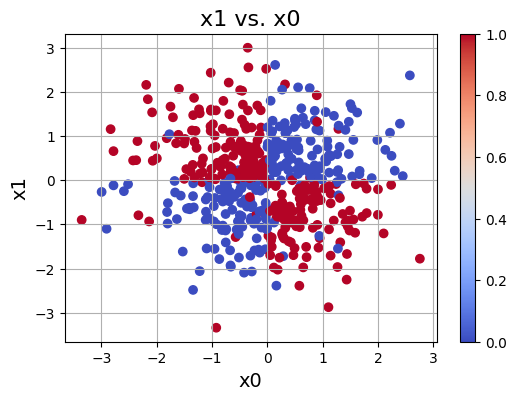

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

In [5]:
# NN DEFINITION, WITH VARIATINOS FOR ABLATION STUDY

import torch 
from torch import nn

class NN43(nn.Module):

    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, 4)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 3)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(3, output_dim)

    def forward(self, x):
        y = self.a1(self.l1(x))
        y = self.a2(self.l2(y))
        y = self.l3(y)
        return y

NN = NN43


class NN4(nn.Module):

    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, 4)
        self.a1 = nn.ReLU()
        self.l3 = nn.Linear(4, output_dim)

    def forward(self, x):
        y = self.a1(self.l1(x))
        y = self.l3(y)
        return y

class NN3(nn.Module):

    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, 3)
        self.a1 = nn.ReLU()
        self.l3 = nn.Linear(3, output_dim)

    def forward(self, x):
        y = self.a1(self.l1(x))
        y = self.l3(y)
        return y

class NN2(nn.Module):

    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, 2)
        self.a1 = nn.ReLU()
        self.l3 = nn.Linear(2, output_dim)

    def forward(self, x):
        y = self.a1(self.l1(x))
        y = self.l3(y)
        return y

class NN0(nn.Module):

    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        y = self.l1(x)
        return y


In [6]:
# LEARNING RATE SCHEDULER

lr_min = 0.0002
lr_max = 0.7
cycle_length = 1500
warmup_iterations = 3000
# cooldown_start = warmup_iterations + cycle_length * 6

def lr_scheduler(i):
    if i < warmup_iterations:
        return lr_min + i/warmup_iterations * (lr_max-lr_min)
    # elif i > cooldown_start:
    #     return lr_min + (lr_max-lr_min) * np.exp(-(i-cooldown_start)/cycle_length)
    else:
        return lr_min + 1/2 * (lr_max-lr_min) * (1 + np.cos((i - warmup_iterations) * np.pi / cycle_length))
    

In [7]:
# MODEL INITIALIZATION AND TRAINING, SGD WITH LR SCHEDULER

model = NN(2, 1)
lossF = nn.BCEWithLogitsLoss()

EPOCHS = 16500
optimizer = torch.optim.SGD(model.parameters(), lr=0.3)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
losses = []
test_losses = []
lrs = []

X = torch.tensor(train[['x0', 'x1']].to_numpy(dtype=np.float32))
y = torch.tensor(train['y'].to_numpy(dtype=np.float32)).view(-1, 1)

X_test = torch.tensor(test[['x0', 'x1']].to_numpy(dtype=np.float32))
y_test = torch.tensor(test['y'].to_numpy(dtype=np.float32)).view(-1, 1)

for i in range(EPOCHS):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = lossF(y_pred, y)
    loss.backward()

    lr = lr_scheduler(i)
    for g in optimizer.param_groups:
        g['lr'] = lr
    optimizer.step()
    
    losses.append(loss.item())

    if i % 200:
        with torch.no_grad():
            test_y_pred = model(X_test)
            test_loss = lossF(test_y_pred, y_test)
            test_losses.append(test_loss.item())

            lrs.append(lr_scheduler(i))
        

Train accuracy: 0.9419999718666077
Test accuracy: 0.9100000262260437


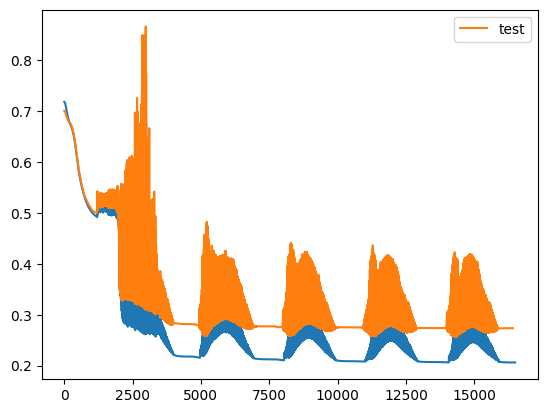

In [8]:
# TRAIN AND TEST ACCURACY AND LOSS

with torch.no_grad():
    y_pred = torch.sigmoid(model(X))
    preds = (y_pred > 0.5).float()
    acc = (preds == y).float().mean().item()
    print('Train accuracy:', acc)

    test_y_pred = torch.sigmoid(model(X_test))
    test_preds = (test_y_pred > 0.5).float()
    test_acc = (test_preds == y_test).float().mean().item()
    print('Test accuracy:', test_acc)

plt.plot(losses)
plt.plot(test_losses, label='test')
plt.legend()

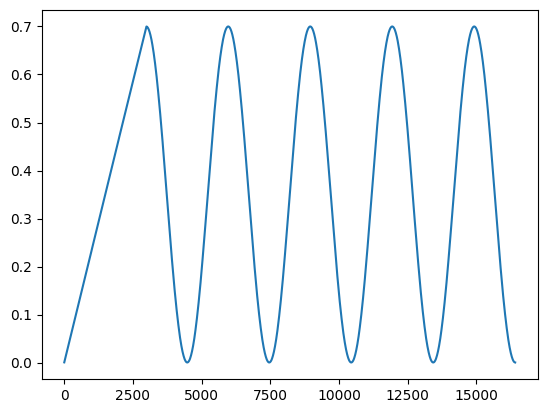

In [9]:
# LEARNING RATE SCHEDULE

plt.plot(lrs)

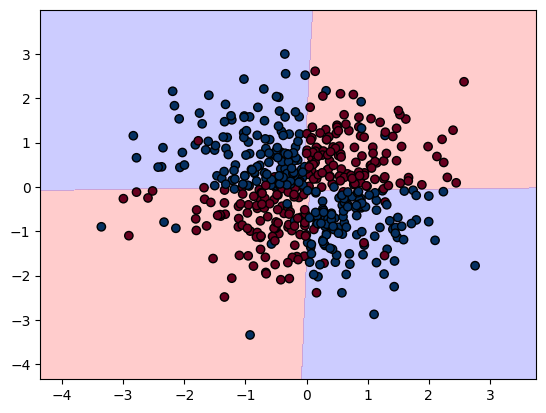

In [10]:
# CLASSIFICATION BORDER

import numpy as np
import matplotlib.pyplot as plt
import torch

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
with torch.no_grad():
    Z = torch.sigmoid(model(grid)).numpy().reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=('red', 'blue'))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=plt.cm.RdBu)
plt.show()


In [12]:
# MODEL SUMMARY

from torchsummary import summary
summary(model, input_size=(2,))




----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 4]              12
              ReLU-2                    [-1, 4]               0
            Linear-3                    [-1, 3]              15
              ReLU-4                    [-1, 3]               0
            Linear-5                    [-1, 1]               4
Total params: 31
Trainable params: 31
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [13]:
# ABLATION STUDY
import itertools

SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.use_deterministic_algorithms(True)

search_space = {'model_class': [NN43, NN4, NN3, NN2, NN0], 'optimizer': ['SGD', 'Adam', 'SGD+LR']}
permutations = [
    {'model_class': m, 'optimizer': o}
    for m, o in itertools.product(search_space['model_class'], search_space['optimizer'])
]

lossF = nn.BCEWithLogitsLoss()
# EPOCHS = 16500
EPOCHS = 16500

losses = {}
test_losses = {}
train_accuracies = {}
test_accuracies = {}

for config in permutations:


    model = config['model_class'](2, 1)

    if config['optimizer'] == 'SGD' or config['optimizer'] == 'SGD+LR':    
        optimizer = torch.optim.SGD(model.parameters(), lr=0.3)
    elif config['optimizer'] == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    model_losses = []
    model_test_losses = []

    X = torch.tensor(train[['x0', 'x1']].to_numpy(dtype=np.float32))
    y = torch.tensor(train['y'].to_numpy(dtype=np.float32)).view(-1, 1)

    X_test = torch.tensor(test[['x0', 'x1']].to_numpy(dtype=np.float32))
    y_test = torch.tensor(test['y'].to_numpy(dtype=np.float32)).view(-1, 1)

    for i in range(EPOCHS):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = lossF(y_pred, y)
        loss.backward()

        if config['optimizer'] == 'SGD+LR':
            lr = lr_scheduler(i)
            for g in optimizer.param_groups:
                g['lr'] = lr

        optimizer.step()
        model_losses.append(loss.item())

        with torch.no_grad():
            test_y_pred = model(X_test)
            test_loss = lossF(test_y_pred, y_test)
            model_test_losses.append(test_loss.item())

    train_accuracies[(config['model_class'], config['optimizer'])] = ((torch.sigmoid(model(X)) > 0.5) == y).float().mean().item()
    test_accuracies[(config['model_class'], config['optimizer'])] = ((torch.sigmoid(model(X_test)) > 0.5) == y_test).float().mean().item()

    losses[(config['model_class'], config['optimizer'])] = model_losses
    test_losses[(config['model_class'], config['optimizer'])] = model_test_losses



            

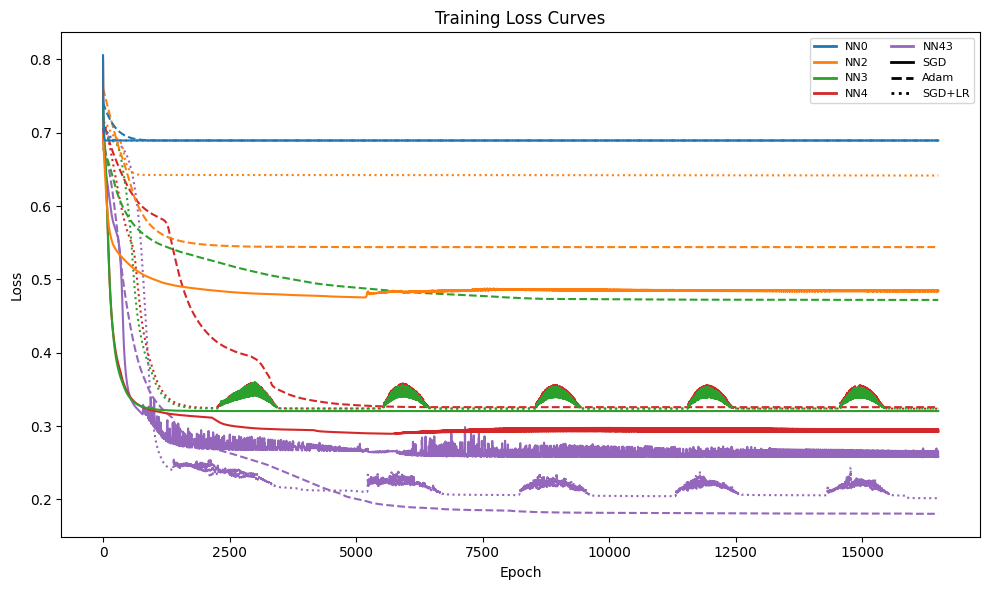

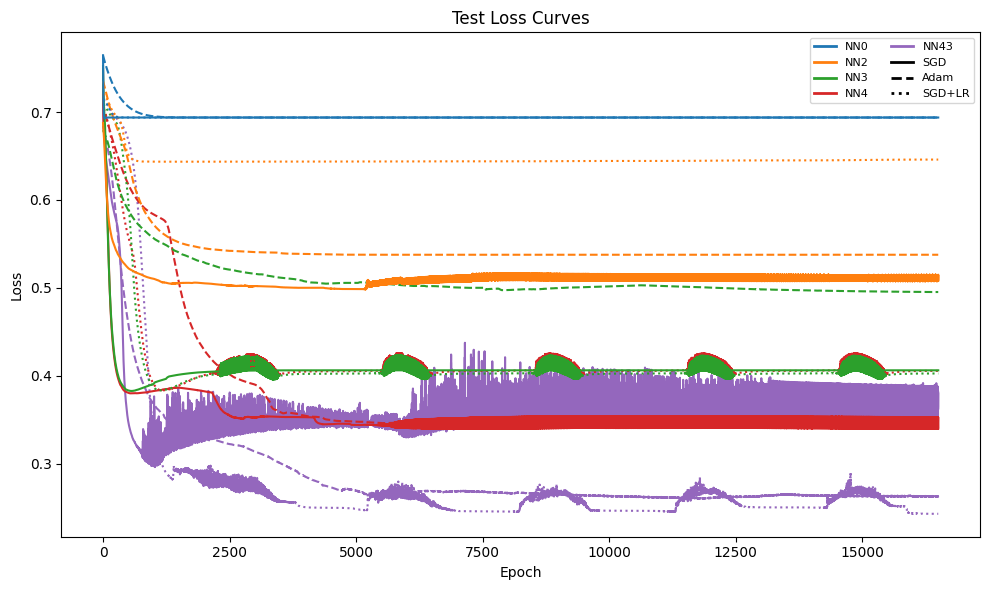

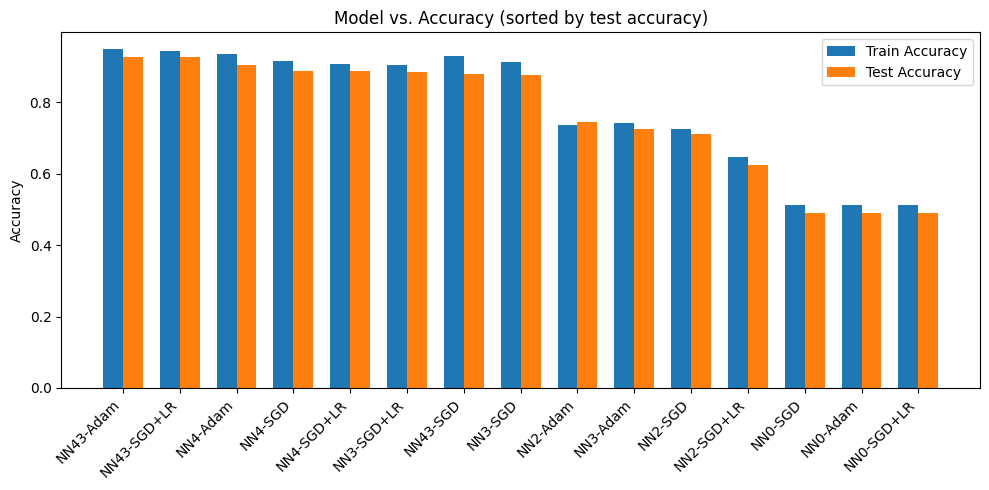

In [14]:
# ABLATION STUDY PLOTS
# disclaimer: chatgpt generated some of the code for the plotsbelow

from matplotlib.lines import Line2D

colors = plt.cm.tab10.colors
model_names = sorted({k[0].__name__ for k in losses.keys()})
color_map = {m: colors[i % len(colors)] for i, m in enumerate(model_names)}
styles = {'SGD': '-', 'Adam': '--', 'SGD+LR': ':'}

plt.figure(figsize=(10,6))
for (model_cls, opt_name), values in losses.items():
    plt.plot(
        values,
        color=color_map[model_cls.__name__],
        linestyle=styles.get(opt_name, '-')
    )

model_legend = [
    Line2D([0], [0], color=color_map[m], lw=2, label=m)
    for m in model_names
]
opt_legend = [
    Line2D([0], [0], color='black', linestyle=styles[o], lw=2, label=o)
    for o in styles
]

plt.title("Training Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(handles=model_legend + opt_legend, ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
for (model_cls, opt_name), values in test_losses.items():
    plt.plot(
        values,
        color=color_map[model_cls.__name__],
        linestyle=styles.get(opt_name, '-')
    )

plt.title("Test Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(handles=model_legend + opt_legend, ncol=2, fontsize=8)
plt.tight_layout()
plt.show()



sorted_items = sorted(
    test_accuracies.items(),
    key=lambda x: x[1],
    reverse=True
)

labels = [f"{m.__name__}-{o}" for (m, o), _ in sorted_items]
test_acc = [v for _, v in sorted_items]
train_acc = [train_accuracies[(m, o)] for (m, o), _ in sorted_items]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, train_acc, width, label='Train Accuracy')
plt.bar(x + width/2, test_acc, width, label='Test Accuracy')

plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model vs. Accuracy (sorted by test accuracy)')
plt.legend()
plt.tight_layout()
plt.show()


<h2>Taks 2.1.3: Discussion</h2>

**How can you make sure the results are reproduable?**

Comparing train and test performance, we can see a slight degree of overfitting, but mostly the model generalizes well to the test set. In this case the test data was used for finetuning of hyperparams, optimizer and learning rate scheduler. If one wanted to be more certain of generalizable results, one could have used some of the training data to validate. However in this case we can be quite certain that the model generalizes because 1) there was not a lot of fine tuning done, so the degree of leackage of test data is quite small, and 2) the model appears to have found a simple decision boundary, indicating an generalizable pattern rather than an overfitted boundary.


**Visualize the network's architecture and decision boundary.**

Done in plots above.


**Which optimizer did you choose? Discuss the differences between SGD and Adam.**

I used SGD for the final results to demonstrate the LR scheduler. I tried Adam too and it gave a more consistent accuracy than SGD without LR scheduler, and approximately equal consistentcy to SGD with the LR scheduler. The achieved accuracy was the same across optimization methods, but with varying sensitivity to initialization parameters. Adam did however have a smoother loss curve, avoiding the 'reset spikes' of SGD with LR scheduler. 

The observations explained above make sense given the differences between SGD and Adam; Adam uses weighted moving averages to smooth and dynamically adjust the learning rate of each parameter. The moving averages keep momentum up to push through local minima, resulting in a more efficient way to get out of local minima than 'restarting' like we did with SGD LR scheduler. The restarts were necessary in SGD since it only considers the gradients at time T, meaning that once in a local minima, the only way out is to through stochastic noise from mini-batches.


**Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?**

The LR scheduler didnt have significant impact on performance, however it made the training process less sensitive to initialization parameters. Before using the LR scheduler, the accuracy could stabilize at local minima between 60% - 94%. However with the LR scheduler, the model gets 'kicked out' of local minima by the spiked learning rate, forcing it to search again for a possibly new local minima. This worked well as the mode now achieves an accuracy > 90% concistenly. However, plotting the learning rate shows that the training of this model could probably be done more efficiently.


**Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.**

The results of the ablanation study are plotted above. Here we can see that Adam and SGD+LR (lr scheduler) performed the best, with standard SGD appearantly getting stuck in local minima. We can also see that Adam had a much more efficient optimization path than SGD+LR. Further we can see that the neural networks with only a single hidden layer performed significantly worse than the NN with two hidden layers, but that it didnt make much difference if the single hidden layer had 3 or 4 neurons. Further we can see that the model with a two dimensional hidden layer and the linear model with no hidden layers perfromed worst.

Key takeaways from the ablation study:
- Adam performs just as well if not better than SGD with LR scheduler while being more efficient and requiring less tuning. Start with Adam.
- Drawing a border requiring two lines in a 2d plane requires at least two tranformations
- LR scheduling can help SGD avoid local minima

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [15]:
# Hmmmmm, why is the first row skipped?
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
data.set_index('ID', inplace=True)
data

0         1         2         3         4         5         6      \
ID                                                                           
0     0.314365  0.646305  0.323849  0.238492  0.655790  0.646305  0.646305   
1     0.587628  0.494976  0.559832 -0.246237  0.513506  0.550567  0.522772   
2     0.590203  0.367673  0.367673  0.367673  0.367673  0.590203  0.367673   
3     0.589296  0.589296  0.579825  0.551415  0.579825  0.579825  0.608236   
4     0.660095  0.470676  0.190366  0.672806  0.470761  0.672766  0.672652   
...        ...       ...       ...       ...       ...       ...       ...   
3995  0.340739  0.340739  0.340739  0.681823  0.340739  0.340739  0.340739   
3996  0.384257  0.384257  0.675221  0.384257  0.384257  0.675221  0.384257   
3997  0.641837  0.651135  0.251329  0.251329  0.651135  0.651135  0.251329   
3998  0.555533  0.555533  0.555533  0.555533  0.555533  0.555533  0.555533   
3999  0.592332  0.480734  0.144265  0.537585  0.262288  0.594780  0.542325   

         7         8         9      ...     16374     16375     16376  \
ID                                  ...                                 
0     0.409205  0.646305  0.276428  ...  0.646305  0.646305  0.655790   
1     0.596893  0.606158  0.596893  ...  0.587628  0.550567  0.587628   
2     0.590203  0.590203  0.590203  ...  0.590203  0.367673  0.590203   
3     0.579825  0.646118  0.579825  ...  0.532474  0.523003  0.589296   
4     0.666151  0.672987  0.470762  ...  0.432001  0.672222  0.190568   
...        ...       ...       ...  ...       ...       ...       ...   
3995  0.672083  0.340739  0.711071  ...  0.340739  0.662355  0.340739   
3996  0.675221  0.675221  0.384257  ...  0.675221  0.384257  0.675221   
3997  0.651135  0.651135  0.251329  ...  0.251329  0.251329  0.651135   
3998 -0.212897  0.555533  0.555533  ...  0.555533  0.555533  0.555533   
3999  0.580735  0.594780  0.553984  ...  0.594780  0.591386  0.594778   

         16377     16378     16379     16380     16381     16382     16383  
ID                                                                          
0     0.238492  0.646305  0.674758  0.646305  0.238492  0.655790  0.646305  
1     0.587628  0.550567  0.587628  0.550567  0.596893  0.494976  0.587628  
2     0.590203  0.590203  0.590203  0.590203  0.590203  0.590203  0.476556  
3     0.589296  0.551415  0.134721  0.475652  0.589296  0.570355  0.551415  
4     0.217329  0.633684  0.673294  0.587914  0.671023  0.207578  0.470765  
...        ...       ...       ...       ...       ...       ...       ...  
3995  0.759779  0.331011  0.759779  0.340739  0.691563  0.340734  0.720789  
3996  0.675221  0.675221  0.384257  0.384257  0.384257  0.675221  0.675221  
3997  0.251329  0.409392  0.604646  0.651135  0.651135  0.660433  0.251329  
3998  0.555533  0.555533  0.555533  0.555533  0.555533  0.555533  0.555533  
3999  0.594795  0.132214  0.532101  0.298391  0.553934  0.594780  0.594794  

[4000 rows x 16384 columns]

In [16]:
# The dataset is heavy. Applying clustering directly on the dataset is likely not feasible. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Columns: 16384 entries, 0 to 16383
dtypes: float64(16384)
memory usage: 500.0 MB


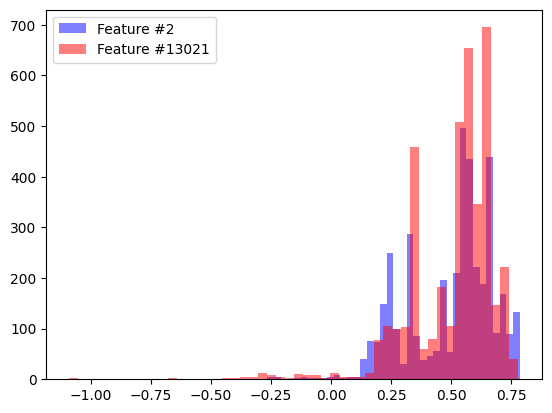

In [17]:
# Features seem to be similarly distributed...
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()
plt.show()

[0.05795259 0.04826602 0.04489324 0.03990051 0.03562923 0.02840252
 0.0259371  0.02439232 0.01932516 0.01841186 0.01783695 0.01652154
 0.01540163 0.01377272 0.01332279 0.01232257 0.01183412 0.01127356
 0.01082823 0.01053513]


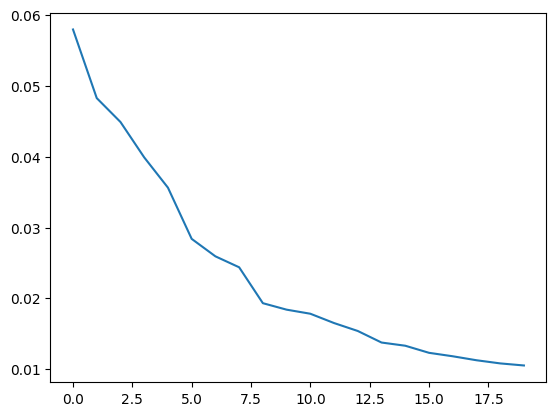

In [18]:
# TRY PCA

from sklearn.decomposition import PCA
data.columns = data.columns.astype(str)

pca = PCA(n_components=20)
pca.fit(data)
var_ratio = pca.explained_variance_ratio_

print(var_ratio)
plt.plot(var_ratio)



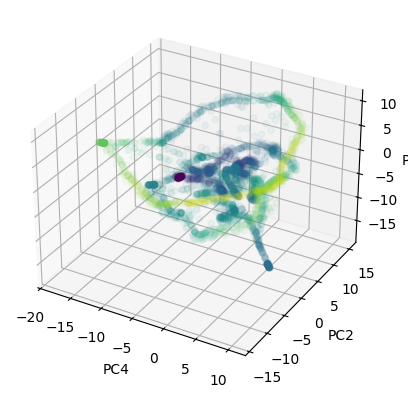

In [19]:
# No obvious clusters among first 3 PCs
%matplotlib inline


pc1 = pca.transform(data)[:, 0]
pc2 = pca.transform(data)[:, 1]
pc3 = pca.transform(data)[:, 2]
pc4 = pca.transform(data)[:, 3]
pc5 = pca.transform(data)[:, 4]

# 3d plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pc1, pc2, pc3, alpha=0.05, c=pc4)
ax.set_xlabel('PC4')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()




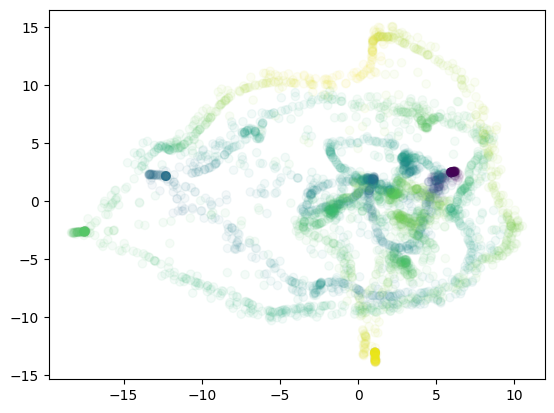

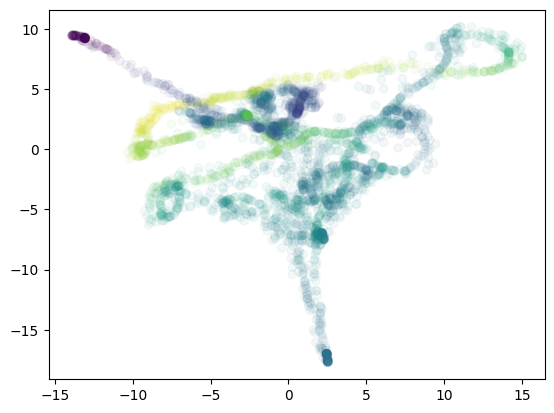

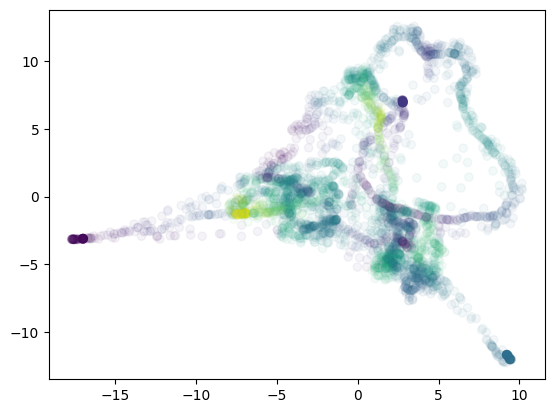

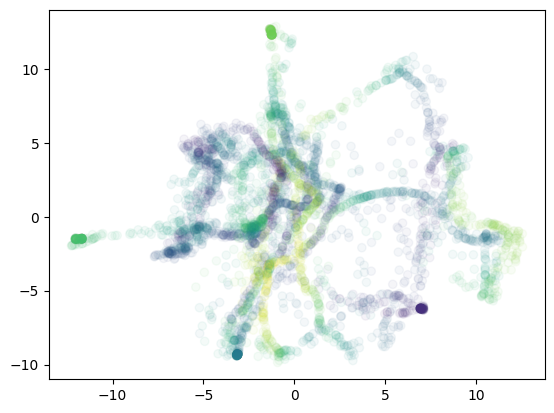

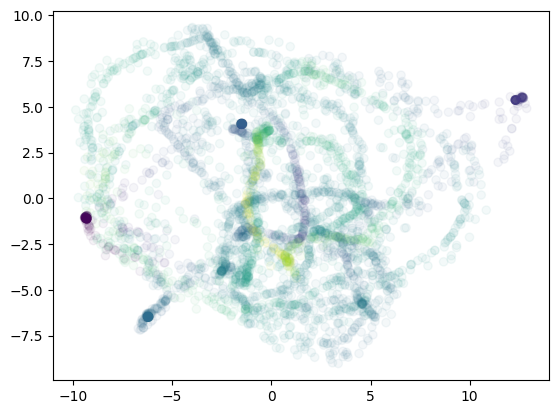

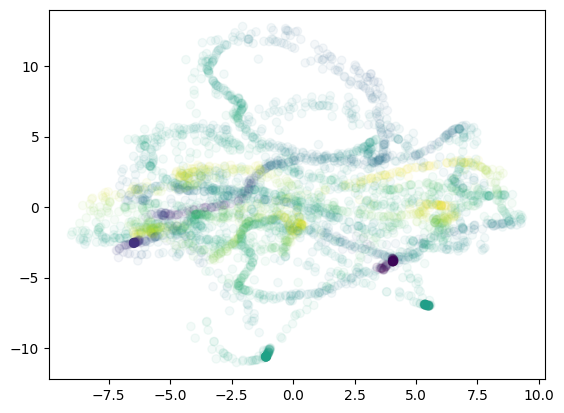

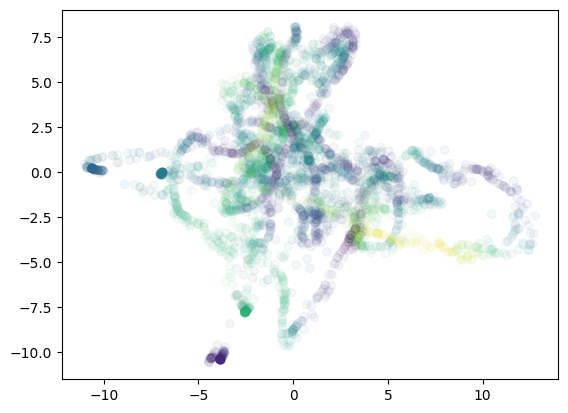

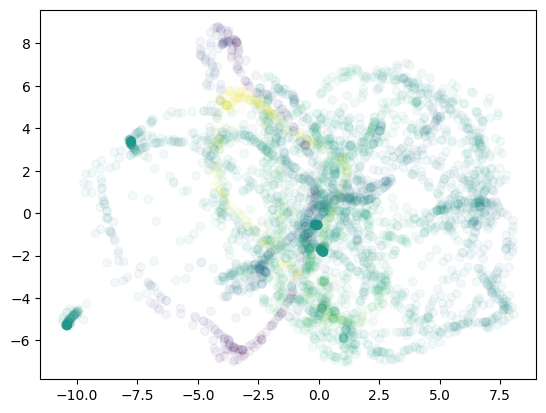

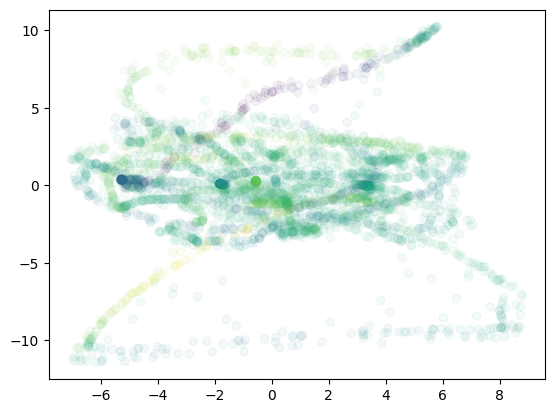

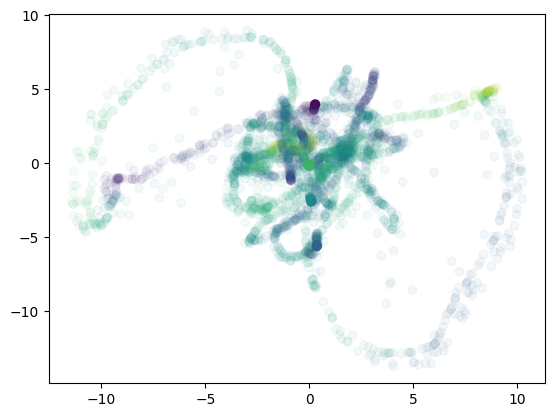

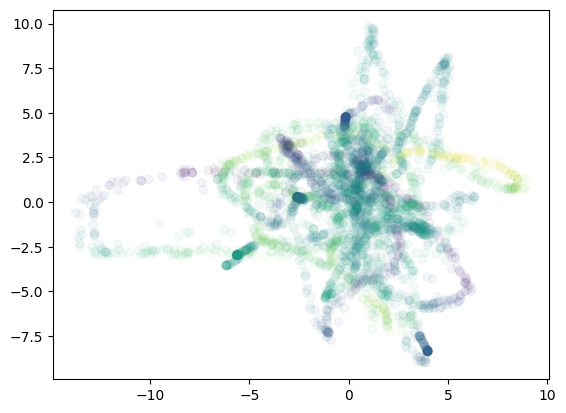

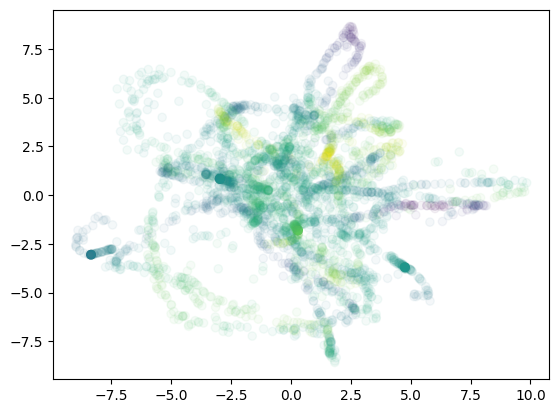

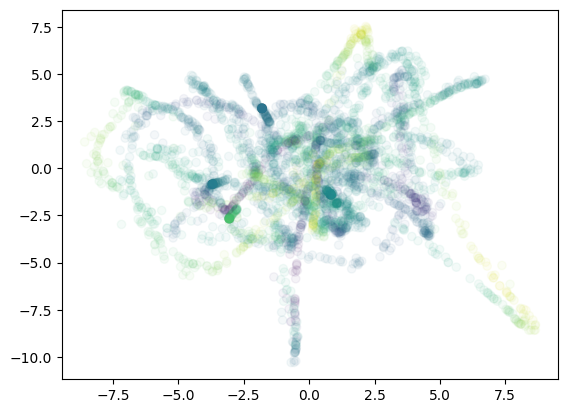

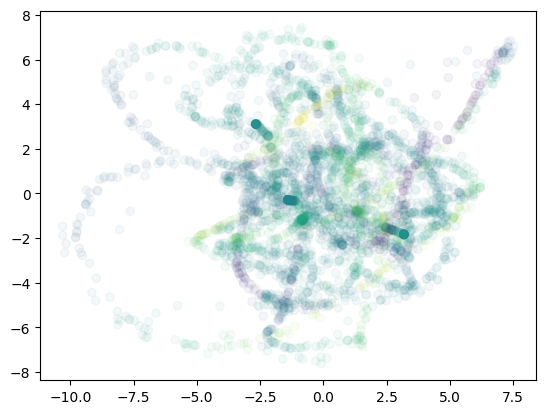

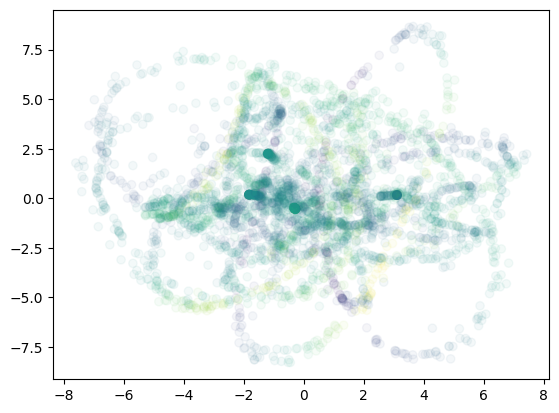

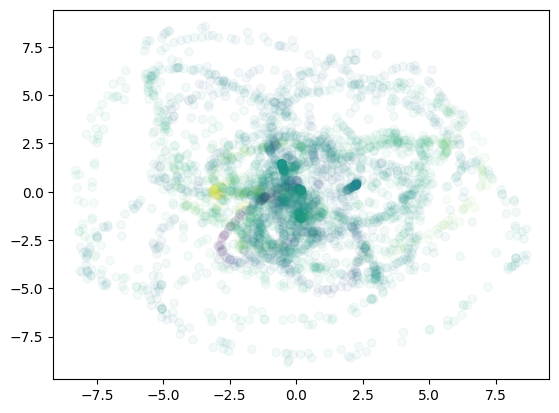

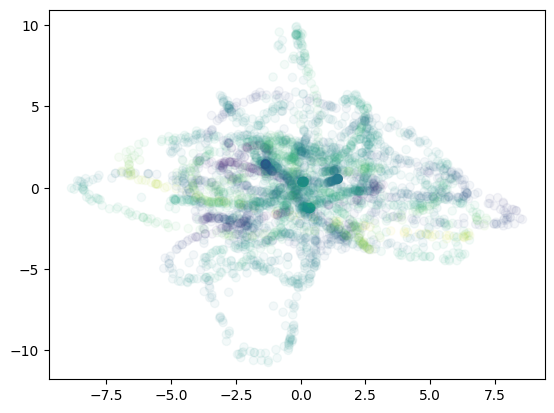

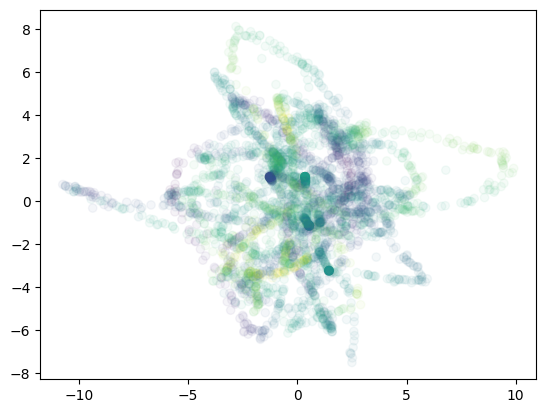

In [20]:
# pair plot three PCs at a time
for i in range(18):
    plt.scatter(pca.transform(data)[:, i], pca.transform(data)[:, i+1], alpha=0.05, c=pca.transform(data)[:, i+2])
    plt.show()


In [21]:
kmeans = KMeans(n_clusters=8, n_init='auto').fit(pca.transform(data))

plt.scatter(pc1, kmeans.labels_)


NameError: name 'KMeans' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

pcs = pca.transform(data)


target_mean = pcs[:, 1:].mean()
target_std = pcs[:, 1:].std()

pcs[:, 0] = ((pcs[:, 0] - pcs[:, 0].mean()) / pcs[:, 0].std()) * target_std + target_mean



/Users/liamshepard/Desktop/Skole/semester5/data/ML/code/TDT4172/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


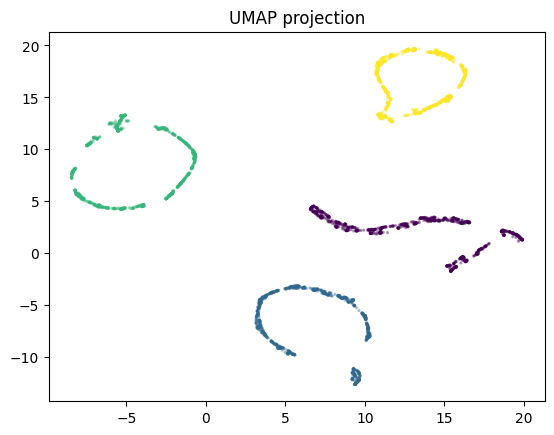

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

umap_model = umap.UMAP(
    n_neighbors=50,
    min_dist=0.0,
    n_components=2,
    metric='cosine',
    init='spectral',
    random_state=42
)

X_embedded = umap_model.fit_transform(pcs)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, alpha=0.3, c=kmeans.labels_)
plt.title("UMAP projection")
plt.show()


In [ ]:
# t-SNE


from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                    init='random', perplexity=50, max_iter=1500, early_exaggeration=20).fit_transform(pcs)

# X_embedded

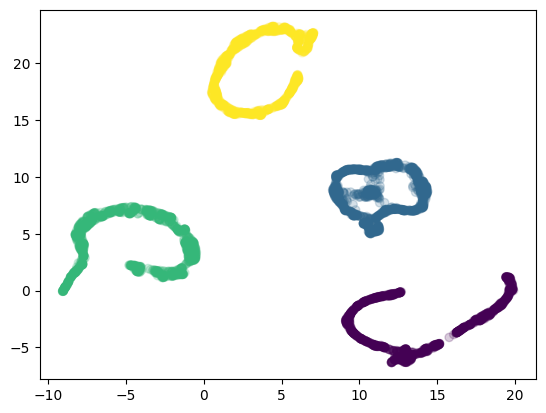

In [ ]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.2, c=kmeans.labels_)
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# plt.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=kmeans.labels_)
# plt.show()


In [ ]:

from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans(n_clusters=4, n_init='auto').fit(X_embedded)

dbscan = DBSCAN(eps=3).fit(X_embedded)

kmeans.labels_

array([0, 3, 0, ..., 0, 3, 3], shape=(4000,), dtype=int32)

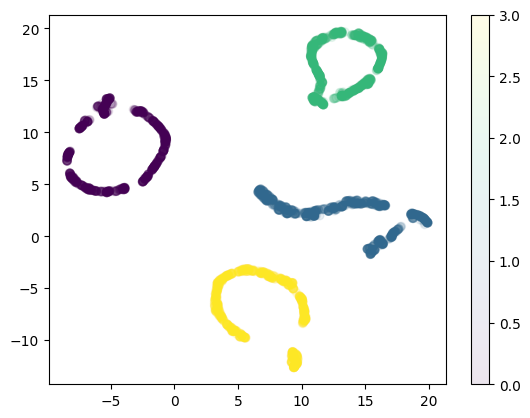

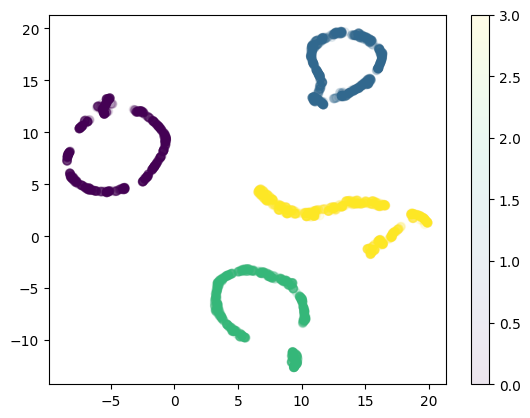

In [ ]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.1, c=dbscan.labels_)
plt.colorbar()
plt.show()

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.1, c=kmeans.labels_)
plt.colorbar()
plt.show()

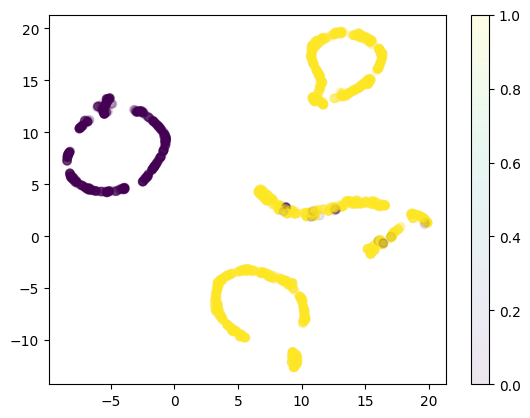

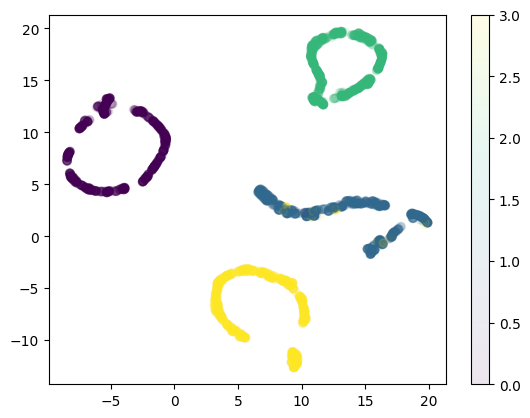

In [ ]:
fasit = pd.read_csv('fasit.csv')

incorrect = (fasit['cluster'] != kmeans.labels_)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.1, c=incorrect)
plt.colorbar()
plt.show()

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.1, c=fasit['cluster'])
plt.colorbar()
plt.show()


In [ ]:
# np.unique(dbscan.labels_)
(dbscan.labels_ == 4).sum()

np.int64(0)

In [ ]:
# mask = kmeans.labels_ == 3
mask = kmeans.labels_ > -1
dists = np.linalg.norm(kmeans.cluster_centers_[3] - X_embedded[mask], axis=1)


idx_cluster3 = np.where(mask)[0]
closest_idx = idx_cluster3[np.argsort(dists)[:70]]

kmeans.labels_[closest_idx] = 4


In [ ]:
best = pd.read_csv('unsupervised_submission_best.csv')

# (submission['Cluster'] != kmeans.labels_).sum()
print('KMeans vs KMEANS:', calculate_clustering_accuracy(dbscan.labels_, kmeans.labels_))
print('Best vs KMeans:', calculate_clustering_accuracy(best['Cluster'], kmeans.labels_))
print('Best vs DBSCAN:', calculate_clustering_accuracy(best['Cluster'], dbscan.labels_))

KMeans vs KMEANS: 1.0
Best vs KMeans: 0.99825
Best vs DBSCAN: 0.99825


In [ ]:
submission = pd.DataFrame(data.index, columns=['ID'])
submission['Cluster'] = kmeans.labels_

submission.to_csv('unsupervised_submission.csv', index=False)

submission

KeyError: 'ID'

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split



data

# We can observe that the number of colimns are 128^2 = 16 384
# We can also sort the columns to fit the correct col_xx to the column number


tsne = TSNE(n_components=3, perplexity=22,random_state=40)
data_tsne = tsne.fit_transform(data.iloc[:,2:])

# The data seems to have some clusters. Let's apply DbScan to find the clusters
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=10)
y_pred = dbscan.fit(data_tsne)
labels = dbscan.labels_



# Plot the data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data_tsne[:, 0], data_tsne[:, 1], data_tsne[:,2], c = labels)
plt.title('DBSCAN clusters on t-SNE')
plt.legend()
plt.show()


pred_df = pd.DataFrame(data=np.array([labels]).T, columns=["cluster"])

pred_df.to_csv("submission.csv")

# Må legge inn ID manuelt

In [ ]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission


---

## 🎯 Note: Clustering Accuracy Evaluation

The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation is solely based on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [ ]:
import numpy as np
import scipy.optimize
import sklearn.metrics

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy

In [ ]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(1.0)

In [ ]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.3333333333333333)

In [ ]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.5)